Covariance Matrix & PCA

---

## What is this?

This notebook shows how the **covariance matrix** describes the spread of multi-dimensional data,  
and how **Principal Component Analysis (PCA)** finds the directions with maximum variance.

---

## Core idea

- The **covariance matrix** tells you how each pair of variables varies together.
- PCA diagonalizes this matrix:
  - The eigenvectors become the principal components (PCs).
  - The eigenvalues show how much variance each PC captures.
- By projecting data onto the top PCs, you keep most of the information with fewer dimensions.
- The Scree Plot shows which directions matter most.

---

## What we’ll do

1. Create or load a simple 2D dataset.
2. Compute the covariance matrix by hand.
3. Diagonalize it with eigenvalues/eigenvectors.
4. Visualize the data, the PCs, and the projections.
5. Make a Scree Plot of explained variance.
6. Interpret how PCA is a real-world version of “rotate → stretch → rotate back”.

---

## Goal

> See how PCA uses the same ideas as SVD and diagonalization to find  
> the best directions to simplify high-dimensional data.


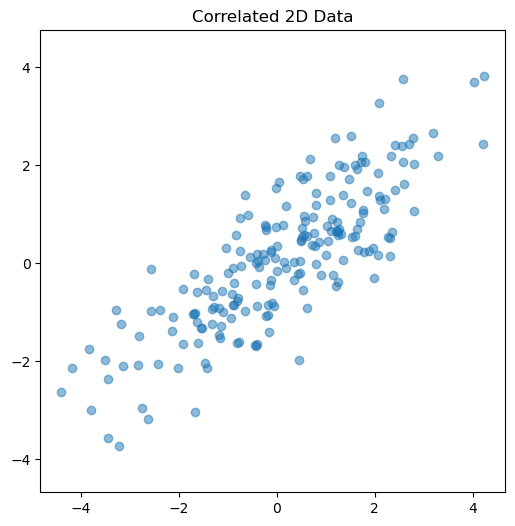

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create 2D data with correlation
np.random.seed(0)
mean = [0, 0]
cov = [[3, 2],
       [2, 2]]
X = np.random.multivariate_normal(mean, cov, 200)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.title("Correlated 2D Data")
plt.axis('equal')
plt.show()


In [3]:
# Center the data
X_centered = X - np.mean(X, axis=0)

# Covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)
print("Covariance Matrix:\n", cov_matrix)


Covariance Matrix:
 [[2.92525066 2.01507411]
 [2.01507411 2.04249278]]


In [4]:
eigvals, eigvecs = np.linalg.eig(cov_matrix)

print("Eigenvalues:", eigvals)
print("Eigenvectors:\n", eigvecs)


Eigenvalues: [4.54671903 0.42102441]
Eigenvectors:
 [[ 0.7790911  -0.62691073]
 [ 0.62691073  0.7790911 ]]


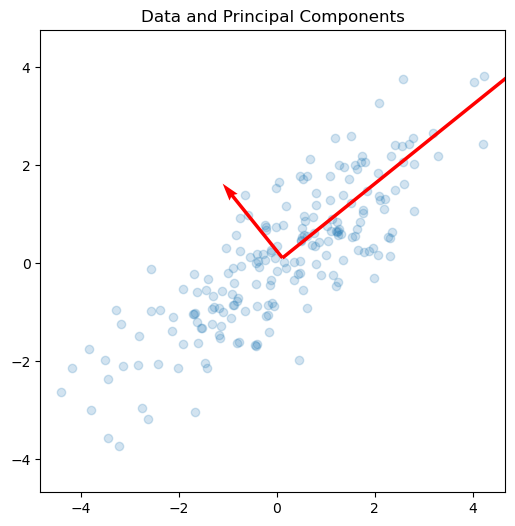

In [5]:
origin = np.mean(X, axis=0)

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[:,0], X[:,1], alpha=0.2)

# Plot principal components
for i in range(2):
    vec = eigvecs[:,i]
    scale = np.sqrt(eigvals[i])
    ax.quiver(*origin, *vec*scale*3, angles='xy', scale_units='xy', scale=1, color='r')

ax.set_title("Data and Principal Components")
ax.axis('equal')
plt.show()


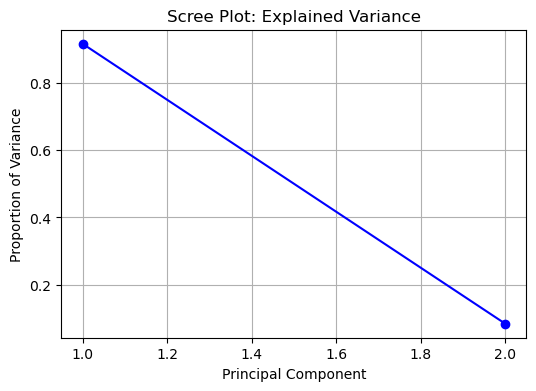

Explained variance ratio: [0.91524836 0.08475164]


In [6]:
explained_variance = eigvals / np.sum(eigvals)

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(eigvals)+1), explained_variance, 'bo-')
plt.title("Scree Plot: Explained Variance")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance")
plt.grid(True)
plt.show()

print("Explained variance ratio:", explained_variance)


## Interpretation

- The **covariance matrix** shows that these two variables are positively correlated.
- The **principal components** (PCs) are the directions where the data spreads out the most.
- The eigenvalues tell you how much variance each PC carries.
- The Scree Plot shows that the first PC captures most of the structure.
- PCA rotates the data to this new basis:
  - Projecting onto the first PC gives the best 1D approximation.
  - Keeping both PCs gives you the full data back.

> PCA is just a real-world version of “SVD for the covariance matrix”:  
> it finds the axes where your data has the clearest story.
